In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

In [2]:
# read the csv path. you might need to change this path
pathName = r"C:\MyFiles\Dropbox\Teaching\Urban_Data_Analsysis\Spring 2021\Data\NYC_Census_Tracts.csv"

In [3]:
# read the csv file as a dataframe
df = pd.read_csv(pathName)

In [4]:
# get a list of columns
df.columns

Index(['GISJOIN', 'Population_2000', 'NH_White_2000', 'NH_Black_2000',
       'Asian_2000', 'HispanicLatino_2000', 'Other_2000', 'HousingUnits_2000',
       'MedHHIncome_2000', 'Age_25_Up_2000', 'Age_25_Up_College_2000',
       'MedianRent_2000', 'MedianHousingValue_2000', 'AreaAcre',
       'Population_610', 'NH_White_610', 'NH_Black_610', 'Asian_610',
       'HispanicLatino_610', 'Age_25_Up_610', 'MedHHIncome_610',
       'HousingUnits_610', 'MedianRent_610', 'MedianHousingValue_610',
       'Age_25_Up_College_610', 'Population_1216', 'NH_White_1216',
       'NH_Black_1216', 'Asian_1216', 'HispanicLatino_1216', 'Age_25_Up_1216',
       'MedHHIncome_1216', 'HousingUnits_1216', 'MedianRent_1216',
       'MedianHousingValue_1216', 'Age_25_Up_College_1216', 'Borough_Name',
       'HeatVulIndex'],
      dtype='object')

In [5]:
# get a sample of rows
df.sample(3)

,GISJOIN,Population_2000,NH_White_2000,NH_Black_2000,Asian_2000,HispanicLatino_2000,Other_2000,HousingUnits_2000,MedHHIncome_2000,Age_25_Up_2000,...,Asian_1216,HispanicLatino_1216,Age_25_Up_1216,MedHHIncome_1216,HousingUnits_1216,MedianRent_1216,MedianHousingValue_1216,Age_25_Up_College_1216,Borough_Name,HeatVulIndex
112,G3600610014601,3846,3135,72,353,225,61,2801,60589,3337,...,624,290,3804,115288,2863,2254,1588700,3186,Manhattan,1
1382,G3600810027100,8911,673,175,2831,5077,155,2743,34206,5662,...,3837,3697,5633,48429,2881,1322,349100,1308,Queens,3
781,G3600470027500,4171,30,3857,77,185,22,1765,30241,2582,...,227,439,3206,60875,1953,1538,692800,1274,Brooklyn,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147 entries, 0 to 2146
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   GISJOIN                  2147 non-null   object
 1   Population_2000          2147 non-null   int64 
 2   NH_White_2000            2147 non-null   int64 
 3   NH_Black_2000            2147 non-null   int64 
 4   Asian_2000               2147 non-null   int64 
 5   HispanicLatino_2000      2147 non-null   int64 
 6   Other_2000               2147 non-null   int64 
 7   HousingUnits_2000        2147 non-null   int64 
 8   MedHHIncome_2000         2147 non-null   int64 
 9   Age_25_Up_2000           2147 non-null   int64 
 10  Age_25_Up_College_2000   2147 non-null   int64 
 11  MedianRent_2000          2147 non-null   int64 
 12  MedianHousingValue_2000  2147 non-null   int64 
 13  AreaAcre                 2147 non-null   int64 
 14  Population_610           2147 non-null  

### Calculating new columns

In [7]:
# calculate a new column using other columns
df['pop_density_2000'] = df['Population_2000']/df['AreaAcre']
df['pop_density_0610'] = df['Population_610']/df['AreaAcre']
df['pop_density_1216'] = df['Population_1216']/df['AreaAcre']

df['Pct_NH_White_2000'] = df['NH_White_2000'] * 100 / df['Population_2000']
df['Pct_NH_White_0610'] = df['NH_White_610'] * 100 / df['Population_610']
df['Pct_NH_White_1216'] = df['NH_White_1216'] * 100 / df['Population_1216']

df['Housing_Density_2000'] = df['HousingUnits_2000'] / df['AreaAcre']
df['Housing_Density_0610'] = df['HousingUnits_610'] / df['AreaAcre']
df['Housing_Density_1216'] = df['HousingUnits_1216'] / df['AreaAcre']

df['pct_black2000']=df['NH_Black_2000']/df['Population_2000']
df['pct_black0610']=df['NH_Black_610']/df['Population_610']
df['pct_black1216']=df['NH_Black_1216']/df['Population_1216']


df['pct_college_2000']=df['Age_25_Up_College_2000']/df['Age_25_Up_2000']
df['pct_college_0610']=df['Age_25_Up_College_610']/df['Age_25_Up_610']
df['pct_college_1216']=df['Age_25_Up_College_1216']/df['Age_25_Up_1216']




df['rentBurden_2000'] = (df['MedianRent_2000']*12)/df['MedHHIncome_2000']
df['rentBurden_0610'] = (df['MedianRent_610']*12)/df['MedHHIncome_610']
# df['rentBurden_1216'] = (df['MedianRent_1216']*12)/df['MedHHIncome_1216'] # this code does not work because there are some income values as 0 and any number / 0 is inf.
# we can use this code instead
# 'col_to_write' can be a new column or an existing one that you want to rewrite
# Condition limits the rows that need to be written. for example: df['a_col'] > number
# value can be a number or a fromula that uses the columns of the df
# syntax: df.loc[(condition),'col_to_write'] = value
df.loc[(df['MedHHIncome_1216']>0),'rentBurden_1216'] = (df['MedianRent_1216']*12)/df['MedHHIncome_1216']

In [8]:
# another example for running a formula on a subset
df.loc[(df['Population_1216']>0),'pct_black_1216'] = (df['NH_Black_1216']*100)/df['Population_1216']

In [9]:
df.sample(5)

,GISJOIN,Population_2000,NH_White_2000,NH_Black_2000,Asian_2000,HispanicLatino_2000,Other_2000,HousingUnits_2000,MedHHIncome_2000,Age_25_Up_2000,...,pct_black2000,pct_black0610,pct_black1216,pct_college_2000,pct_college_0610,pct_college_1216,rentBurden_2000,rentBurden_0610,rentBurden_1216,pct_black_1216
585,G3600470059000,1878,835,189,744,99,11,667,46188,1364,...,0.100639,0.072448,0.103175,0.196481,0.298050,0.364632,0.168096,0.222476,0.285279,10.317460
1039,G3600470086600,3215,18,3021,13,156,7,1184,38646,2040,...,0.939658,0.878234,0.943201,0.161765,0.120799,0.290198,0.198416,0.371935,0.316033,94.320080
1233,G3600810010200,2742,429,468,741,796,308,807,43594,1809,...,0.170678,0.203534,0.141124,0.166390,0.114589,0.203865,0.200395,0.196136,0.321797,14.112388
876,G3600470041900,3908,56,868,27,2931,26,1171,22788,2040,...,0.222108,0.230014,0.160682,0.067157,0.077947,0.185954,0.243813,0.291855,0.379708,16.068152
1500,G3600810057900,1566,1091,2,71,377,25,651,32625,1082,...,0.001277,0.000000,0.003544,0.059150,0.174458,0.204890,0.242391,0.528908,0.290420,0.354400


<AxesSubplot:xlabel='MedianHousingValue_1216', ylabel='Count'>

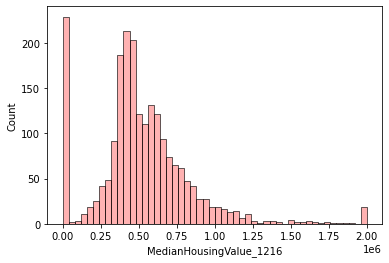

In [11]:
# histogram
sns.histplot(data=df,x='MedianHousingValue_1216',bins=50,color='Red',alpha=0.3)

<AxesSubplot:xlabel='MedianHousingValue_2000', ylabel='Count'>

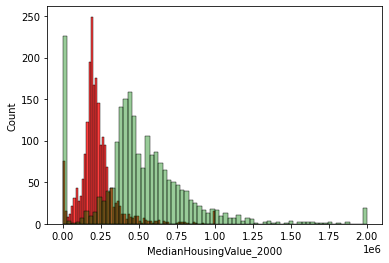

In [12]:
sns.histplot(data=df,x='MedianHousingValue_2000',bins=70,color='Red')
sns.histplot(data=df,x='MedianHousingValue_1216',bins=70,color='Green',alpha= 0.4)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147 entries, 0 to 2146
Data columns (total 57 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   GISJOIN                  2147 non-null   object 
 1   Population_2000          2147 non-null   int64  
 2   NH_White_2000            2147 non-null   int64  
 3   NH_Black_2000            2147 non-null   int64  
 4   Asian_2000               2147 non-null   int64  
 5   HispanicLatino_2000      2147 non-null   int64  
 6   Other_2000               2147 non-null   int64  
 7   HousingUnits_2000        2147 non-null   int64  
 8   MedHHIncome_2000         2147 non-null   int64  
 9   Age_25_Up_2000           2147 non-null   int64  
 10  Age_25_Up_College_2000   2147 non-null   int64  
 11  MedianRent_2000          2147 non-null   int64  
 12  MedianHousingValue_2000  2147 non-null   int64  
 13  AreaAcre                 2147 non-null   int64  
 14  Population_610          

<AxesSubplot:xlabel='pct_black_1216', ylabel='MedianHousingValue_1216'>

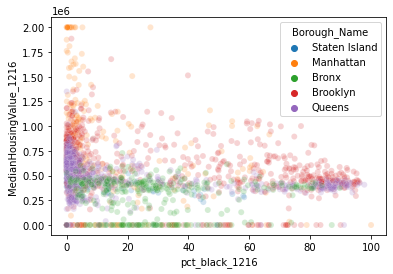

In [14]:
# simple scatter plot
sns.scatterplot(data=df, y ='MedianHousingValue_1216',x ='pct_black_1216',alpha=0.2, hue='Borough_Name')

In [15]:
dfSub = df.loc[df['MedianHousingValue_1216']>100000]

<AxesSubplot:xlabel='MedianHousingValue_1216', ylabel='Count'>

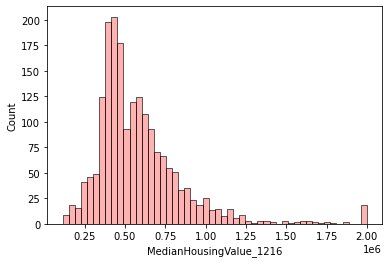

In [18]:
sns.histplot(data=dfSub,x='MedianHousingValue_1216',bins=50,color='Red',alpha=0.3)

### simple scatter plot

<AxesSubplot:xlabel='pct_black_1216', ylabel='MedianHousingValue_1216'>

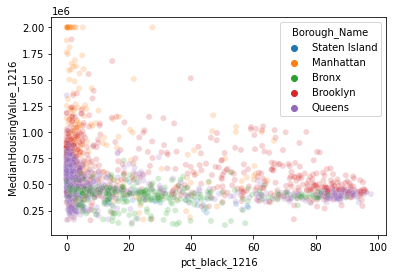

In [16]:
# simple scatter plot
sns.scatterplot(data=dfSub, y ='MedianHousingValue_1216',x ='pct_black_1216',alpha=0.2, hue='Borough_Name')

## Scatter plot with a regression line

<AxesSubplot:xlabel='pct_black_1216', ylabel='MedianHousingValue_1216'>

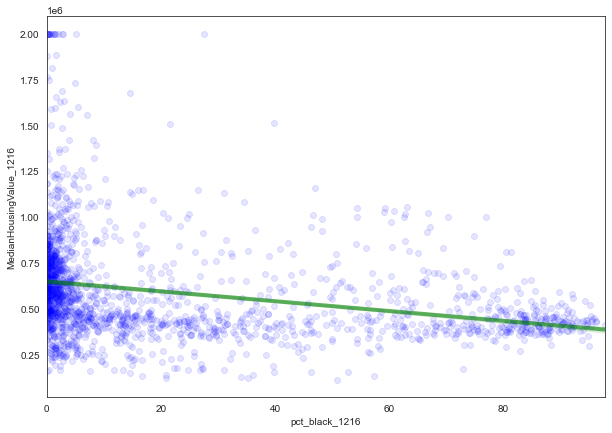

In [19]:
# set teh style
sns.set_style("white")
# seet the size
fig = plt.gcf()
# Changing Seaborn Plot size
fig.set_size_inches(10, 7)
# plot
sns.regplot(x=dfSub['pct_black_1216'], y=dfSub['MedianHousingValue_1216'],
            scatter_kws ={'color':'blue','alpha':0.1},
            line_kws={"color":"green","alpha":0.6,"lw":4})

In [29]:
# in case you need to fix inf or nan values
dfSub['MedianHousingValue_1216'] = (pd.to_numeric(dfSub['MedianHousingValue_1216'], errors='coerce')).copy()
dfSub.replace([np.inf, -np.inf,0], np.nan)
# drop nan values
dfSub.dropna(inplace=True)

C:\Users\Mehdi\.conda\envs\UrbanDataAnalysis\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Univariate Regression

In [23]:
independent_Var = dfSub['pct_black1216']
dependent_var   = dfSub['MedianHousingValue_1216']

independent_Var = sm.add_constant(independent_Var)

# Fit and summarize OLS model
# you can drop missing values
linearModel = sm.OLS(dependent_var, independent_Var, missing='drop')
results = linearModel.fit()
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     MedianHousingValue_1216   R-squared:                       0.080
Model:                                 OLS   Adj. R-squared:                  0.079
Method:                      Least Squares   F-statistic:                     165.0
Date:                     Fri, 23 Apr 2021   Prob (F-statistic):           2.73e-36
Time:                             17:49:35   Log-Likelihood:                -26591.
No. Observations:                     1910   AIC:                         5.319e+04
Df Residuals:                         1908   BIC:                         5.320e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

## Multivariate regression

In [26]:
independent_Var = dfSub[['pct_black1216','pct_college_1216']]
dependent_var = dfSub['MedianHousingValue_1216']
# add the constant value to the indpendet variables
independent_Var = sm.add_constant(independent_Var)

# Fit and summarize OLS model
# you can drop missing values
linearModel = sm.OLS(dependent_var, independent_Var,missing='drop')
results = linearModel.fit()
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     MedianHousingValue_1216   R-squared:                       0.363
Model:                                 OLS   Adj. R-squared:                  0.363
Method:                      Least Squares   F-statistic:                     544.0
Date:                     Fri, 23 Apr 2021   Prob (F-statistic):          1.20e-187
Time:                             17:53:53   Log-Likelihood:                -26239.
No. Observations:                     1910   AIC:                         5.248e+04
Df Residuals:                         1907   BIC:                         5.250e+04
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------